In [1]:
#
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sqlalchemy
from config import db_pass
from config import db_host
from config import db_port
from config import db_name
cstring = 'postgresql://postgres:'+db_pass+'@'+db_host+':'+db_port+'/'+db_name
#import psycopg2
from sqlalchemy import create_engine
engine = create_engine(cstring)
connection = engine.connect()

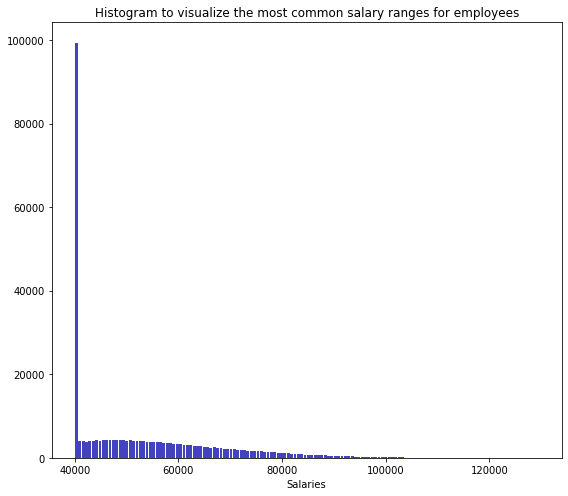

In [4]:
salary_df = engine.execute("select distinct emp_no, salary from salaries")
sal = []

for r in salary_df:
    #print(r['emp_no'], r['salary'])
    sal.append(pd.to_numeric(r['salary']))
#
fig=plt.figure(figsize=(8, 7))
n, bins, patches = plt.hist(sal,  bins='auto', color='#0504aa',
                            alpha=0.75, rwidth=0.85
                             )
plt.xlabel('Salaries')
plt.title('Histogram to visualize the most common salary ranges for employees')
maxfreq = n.max()
#plt.ylim(ymax=np.ceil(maxfreq / 200) * 10 if maxfreq % 10 else maxfreq + 5000)
plt.tight_layout()
plt.show()

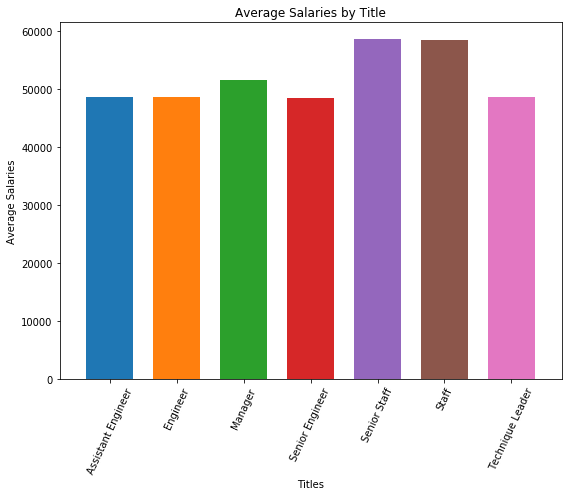

In [6]:
# average salary by title
avg_sal = engine.execute("select title, avg(salary) salary from titles t,employees e,salaries s where e.emp_title_id = t.title_id and s.emp_no = e.emp_no group by title")
#
# Generate a bar plot showing average salary by title
#
plt.figure(figsize=(8, 7))
bottom = 0
title = []

for row in avg_sal:
    plt.bar(row['title'], row['salary'], width=0.7)
    title.append(row['title'])

plt.title("Average Salaries by Title")
plt.xticks(rotation=65)
plt.xlabel('Titles')
plt.ylabel('Average Salaries')
plt.xlim(-0.75, len(title)-.25)
plt.tight_layout()
plt.show()